<a href="https://colab.research.google.com/github/ashesm/ISYS5002_PORTFOLIO1/blob/main/Ash_asx_stock_returns_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will:

* Download prices
* Calculate Returns
* Calculate mean and standard deviation of returns

Lets load the modules first.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

Work around as Yahoo FInance made a change causing error with Pandas Datareader 


In [ ]:
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()

In [ ]:
help(pdr.get_data_yahoo)

## Step 1: Specify date range for analysis 

Here we begin by creating start and end dates using pythons datetime module. 

In [ ]:
start = "2009-01-01"
end = "2021-09-15"

## Step 2: Select the stocks/tickers you would like to analyse

For Australian stocks, yahoo tickers require '.AX' to be specified at the end of the ticker symbol.  For other tickers use the search bar in yahoo finance.

In [ ]:
tickers = ['ANZ.AX' , 'NAB.AX' , 'WBC.AX' , 'CBA.AX' ]

# Step 3: call the Pandas_Datareader DataReader module

In [ ]:
df = pdr.get_data_yahoo(tickers, start, end)

[*********************100%***********************]  4 of 4 completed


In [ ]:
print(df.head())

           Adj Close                       ...     Volume                      
              ANZ.AX     CBA.AX    NAB.AX  ...     CBA.AX     NAB.AX     WBC.AX
Date                                       ...                                 
2009-01-02  7.642381  14.494561  8.887321  ...  2269780.0  2572210.0  3655805.0
2009-01-05  7.587002  14.196732  8.813263  ...  2908531.0  2822855.0  5161118.0
2009-01-06  7.753141  14.628585  9.035444  ...  2564247.0  3803343.0  4922125.0
2009-01-07  7.727966  14.370469  9.100794  ...  3413898.0  4676568.0  5779916.0
2009-01-08  7.662520  14.176876  9.087723  ...  3969963.0  2949396.0  4588396.0

[5 rows x 24 columns]


In [ ]:
df.head()

Adj Close                       ...     Volume                      
              ANZ.AX     CBA.AX    NAB.AX  ...     CBA.AX     NAB.AX     WBC.AX
Date                                       ...                                 
2009-01-02  7.642381  14.494561  8.887321  ...  2269780.0  2572210.0  3655805.0
2009-01-05  7.587002  14.196732  8.813263  ...  2908531.0  2822855.0  5161118.0
2009-01-06  7.753141  14.628585  9.035444  ...  2564247.0  3803343.0  4922125.0
2009-01-07  7.727966  14.370469  9.100794  ...  3413898.0  4676568.0  5779916.0
2009-01-08  7.662520  14.176876  9.087723  ...  3969963.0  2949396.0  4588396.0

[5 rows x 24 columns]

## Step 4: Understanding the pandas dataframe structure

A good way to quickly understand how a pandas dataframe is structured is to look at the index and the columns.

In [ ]:
df.index

DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
               '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07',
               '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13',
               '2021-09-14', '2021-09-15'],
              dtype='datetime64[ns]', name='Date', length=3214, freq=None)

In [ ]:
df.columns

MultiIndex([('Adj Close', 'ANZ.AX'),
            ('Adj Close', 'CBA.AX'),
            ('Adj Close', 'NAB.AX'),
            ('Adj Close', 'WBC.AX'),
            (    'Close', 'ANZ.AX'),
            (    'Close', 'CBA.AX'),
            (    'Close', 'NAB.AX'),
            (    'Close', 'WBC.AX'),
            (     'High', 'ANZ.AX'),
            (     'High', 'CBA.AX'),
            (     'High', 'NAB.AX'),
            (     'High', 'WBC.AX'),
            (      'Low', 'ANZ.AX'),
            (      'Low', 'CBA.AX'),
            (      'Low', 'NAB.AX'),
            (      'Low', 'WBC.AX'),
            (     'Open', 'ANZ.AX'),
            (     'Open', 'CBA.AX'),
            (     'Open', 'NAB.AX'),
            (     'Open', 'WBC.AX'),
            (   'Volume', 'ANZ.AX'),
            (   'Volume', 'CBA.AX'),
            (   'Volume', 'NAB.AX'),
            (   'Volume', 'WBC.AX')],
           )

In [ ]:
df.index, df.columns, df.head()

(DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
                '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
                '2009-01-14', '2009-01-15',
                ...
                '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07',
                '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13',
                '2021-09-14', '2021-09-15'],
               dtype='datetime64[ns]', name='Date', length=3214, freq=None),
 MultiIndex([('Adj Close', 'ANZ.AX'),
             ('Adj Close', 'CBA.AX'),
             ('Adj Close', 'NAB.AX'),
             ('Adj Close', 'WBC.AX'),
             (    'Close', 'ANZ.AX'),
             (    'Close', 'CBA.AX'),
             (    'Close', 'NAB.AX'),
             (    'Close', 'WBC.AX'),
             (     'High', 'ANZ.AX'),
             (     'High', 'CBA.AX'),
             (     'High', 'NAB.AX'),
             (     'High', 'WBC.AX'),
             (      'Low', 'ANZ.AX'),
             (      'Low', 'CBA.

In [ ]:
print(df.index)
print(df.columns)

DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
               '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07',
               '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13',
               '2021-09-14', '2021-09-15'],
              dtype='datetime64[ns]', name='Date', length=3214, freq=None)
MultiIndex([('Adj Close', 'ANZ.AX'),
            ('Adj Close', 'CBA.AX'),
            ('Adj Close', 'NAB.AX'),
            ('Adj Close', 'WBC.AX'),
            (    'Close', 'ANZ.AX'),
            (    'Close', 'CBA.AX'),
            (    'Close', 'NAB.AX'),
            (    'Close', 'WBC.AX'),
            (     'High', 'ANZ.AX'),
            (     'High', 'CBA.AX'),
            (     'High', 'NAB.AX'),
            (     'High', 'WBC.AX'),
            (      'Low', 'ANZ.AX'),
            (      'Low', 'CBA.AX'),
            (    

## Step 5: Access useful attributes easily

We are interested in the closing price information for all of these stocks.

In [ ]:
Close = df['Close']
Close.head

<bound method NDFrame.head of                ANZ.AX      CBA.AX     NAB.AX     WBC.AX
Date                                                   
2009-01-02  15.180000   29.042646  19.406162  16.646669
2009-01-05  15.070000   28.445881  19.244446  16.527479
2009-01-06  15.400000   29.311192  19.729599  16.914843
2009-01-07  15.350000   28.793995  19.872292  16.755924
2009-01-08  15.220000   28.406096  19.843754  16.457954
...               ...         ...        ...        ...
2021-09-09  27.510000  100.550003  28.400000  25.600000
2021-09-10  27.590000  101.089996  28.450001  25.650000
2021-09-13  27.620001  101.300003  28.180000  25.639999
2021-09-14  27.709999  101.580002  28.230000  25.719999
2021-09-15  27.610001  101.410004  28.139999  25.790001

[3214 rows x 4 columns]>

In [ ]:
df.Close

,ANZ.AX,CBA.AX,NAB.AX,WBC.AX
Date,,,,
2009-01-02,15.180000,29.042646,19.406162,16.646669
2009-01-05,15.070000,28.445881,19.244446,16.527479
2009-01-06,15.400000,29.311192,19.729599,16.914843
2009-01-07,15.350000,28.793995,19.872292,16.755924
2009-01-08,15.220000,28.406096,19.843754,16.457954
...,...,...,...,...
2021-09-09,27.510000,100.550003,28.400000,25.600000
2021-09-10,27.590000,101.089996,28.450001,25.650000
2021-09-13,27.620001,101.300003,28.180000,25.639999


In [ ]:
Close = df['Close']
print(Close)


               ANZ.AX      CBA.AX     NAB.AX     WBC.AX
Date                                                   
2009-01-02  15.180000   29.042646  19.406162  16.646669
2009-01-05  15.070000   28.445881  19.244446  16.527479
2009-01-06  15.400000   29.311192  19.729599  16.914843
2009-01-07  15.350000   28.793995  19.872292  16.755924
2009-01-08  15.220000   28.406096  19.843754  16.457954
...               ...         ...        ...        ...
2021-09-09  27.510000  100.550003  28.400000  25.600000
2021-09-10  27.590000  101.089996  28.450001  25.650000
2021-09-13  27.620001  101.300003  28.180000  25.639999
2021-09-14  27.709999  101.580002  28.230000  25.719999
2021-09-15  27.610001  101.410004  28.139999  25.790001

[3214 rows x 4 columns]


## Step 6: Gain insights quickly with pandas describe method


In [ ]:
df.describe()

Adj Close               ...        Volume              
            ANZ.AX       CBA.AX  ...        NAB.AX        WBC.AX
count  3214.000000  3212.000000  ...  3.212000e+03  3.212000e+03
mean     19.064279    52.235186  ...  6.726703e+06  7.398109e+06
std       5.464520    19.342084  ...  3.827758e+06  3.885940e+06
min       5.986029    11.948084  ...  0.000000e+00  0.000000e+00
25%      13.472273    30.705282  ...  4.422088e+06  4.901542e+06
50%      20.316768    56.786320  ...  5.857673e+06  6.463967e+06
75%      23.620510    65.034241  ...  7.903465e+06  8.819979e+06
max      29.530001   106.060188  ...  6.043383e+07  4.655552e+07

[8 rows x 24 columns]

In [ ]:
Close.describe()

,ANZ.AX,CBA.AX,NAB.AX,WBC.AX
count,3214.000000,3212.000000,3212.000000,3212.000000
mean,25.874942,68.705414,26.603584,26.865908
std,4.803345,15.493867,4.390008,5.304591
min,11.890000,23.940290,13.880000,14.100000
25%,22.832500,54.032254,23.591806,22.663208
50%,26.375000,72.882553,26.608685,27.145195
75%,28.965000,80.110001,29.850000,31.267134
max,37.189999,108.169998,37.642250,39.620266


In [ ]:
df.info

<bound method DataFrame.info of             Adj Close                         ...     Volume                      
               ANZ.AX      CBA.AX     NAB.AX  ...     CBA.AX     NAB.AX     WBC.AX
Date                                          ...                                 
2009-01-02   7.642381   14.494561   8.887321  ...  2269780.0  2572210.0  3655805.0
2009-01-05   7.587002   14.196732   8.813263  ...  2908531.0  2822855.0  5161118.0
2009-01-06   7.753141   14.628585   9.035444  ...  2564247.0  3803343.0  4922125.0
2009-01-07   7.727966   14.370469   9.100794  ...  3413898.0  4676568.0  5779916.0
2009-01-08   7.662520   14.176876   9.087723  ...  3969963.0  2949396.0  4588396.0
...               ...         ...        ...  ...        ...        ...        ...
2021-09-09  27.510000  100.550003  28.400000  ...  2468569.0  6209123.0  6285165.0
2021-09-10  27.590000  101.089996  28.450001  ...  1995586.0  4490010.0  3862459.0
2021-09-13  27.620001  101.300003  28.180000  ...  1119

In [ ]:
Close.describe()

,ANZ.AX,CBA.AX,NAB.AX,WBC.AX
count,3214.000000,3212.000000,3212.000000,3212.000000
mean,25.874942,68.705414,26.603584,26.865908
std,4.803345,15.493867,4.390008,5.304591
min,11.890000,23.940290,13.880000,14.100000
25%,22.832500,54.032254,23.591806,22.663208
50%,26.375000,72.882553,26.608685,27.145195
75%,28.965000,80.110001,29.850000,31.267134
max,37.189999,108.169998,37.642250,39.620266


## Step 7: Plot and save

In [ ]:
Close.describe(percentiles=[0.1,0.5,0.9])

,ANZ.AX,CBA.AX,NAB.AX,WBC.AX
count,3214.000000,3212.000000,3212.000000,3212.000000
mean,25.874942,68.705414,26.603584,26.865908
std,4.803345,15.493867,4.390008,5.304591
min,11.890000,23.940290,13.880000,14.100000
10%,19.320000,49.015433,21.280190,19.827018
50%,26.375000,72.882553,26.608685,27.145195
90%,32.090000,84.769997,32.459999,33.401602
max,37.189999,108.169998,37.642250,39.620266


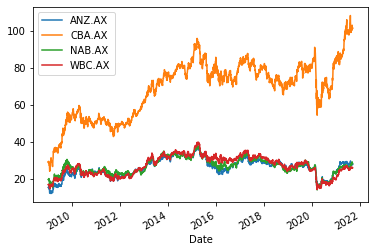

In [ ]:
Close.plot()

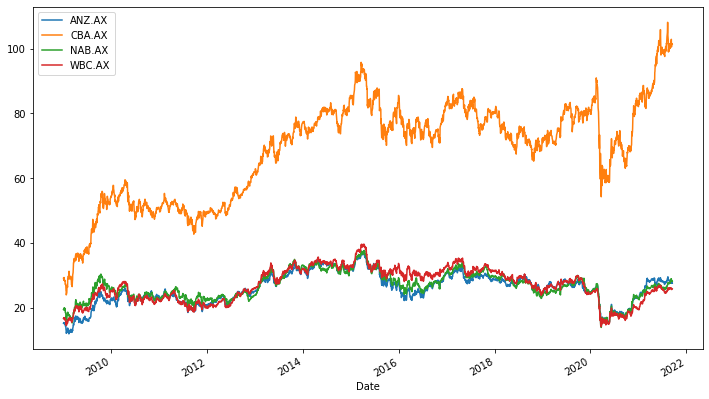

In [ ]:
Close.plot(figsize=(12,7))
plt.savefig("AUSSIE_BANKS")